# Data Fellowship - Time Series analysis by Karl Merisalu


# Overview

At the FAA, it's critical for us to have insight into the ways our market is changing so that we can prepare for the future.

This study looks at historical air traffic (specifically in terms of passenger numbers) in order to make predictions about what US air traffic will look like in the future.

## Time-Series Analysis
Put simply, time series data is any data that shows how a variable changes over time.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## Loading, explore and transform data

In [2]:
df = pd.read_csv('air-passengers.csv')
df.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [3]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
# checking if there are any missing values
df.isnull().values.any()

False

In [5]:
# import datetime in order to start converting data from dataframe to a series
from datetime import datetime

In [6]:
# setting month column to datetime value and setting it as index value
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
# assigning passenger # column to a new times series variable
ts = df['#Passengers']
type(ts)

pandas.core.series.Series

In [8]:
ts.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

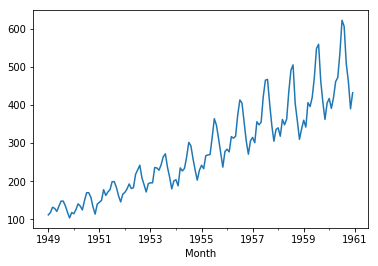

In [9]:
ts.plot()

## Decomposition of data

Decomposing data into 3: 
1) trend (The general direction data is travelling (like upwards or downwards)
2) seaonality (Cycles we see repeating in the data)
3) noise (The random variation that occurs naturally in the data)

Component parts can be added or multiplied together (additive vs multiplicative model). looking at the chart above the data looks multiplicative, because the pattern/trend seems to be increasing at an increasing rate.

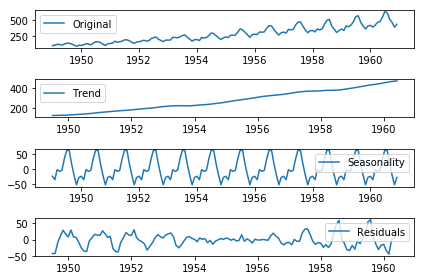

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

# creating 3 new variables of decomposed parts
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [11]:
from platform import python_version
print(python_version())

3.6.0


## Model and transform

Need to ensure that data is stationary - that it's mean, variance and covariance are constant over time

In [12]:
# using kpss method to determine if data is stationary
from statsmodels.tsa.stattools import kpss
kpss(ts)

C:\UBS\Dev\Miniconda\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.0521750110135093,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In this case, our p-value is less than 0.05 (it is 0.01), meaning we should reject the null hypothesis. Our data is not stationary.

We need to do some transformations to make our data stationary. Let's remember what it looks like.

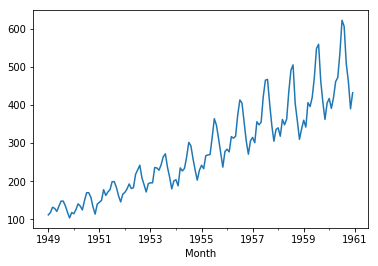

In [14]:
# checking again how data looks like
ts.plot()

At the moment, our data does not have (1) constant variance or (2) contant mean. (The covariance seems constant.) In our simple plot, we see that the variance in our data increases as time goes on and the mean also increases as time goes on.

A common way to remove this changing variance is to take the natural log of all of the values in our dataset. (You may vaguely remember logarithms from school. The most important thing to remember is that they remove exponential growth from data.)


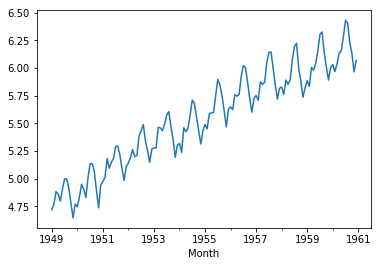

In [15]:
# taking a log of the data to remove exponsential growth (trend) and also increasing variance
ts_log = np.log(ts)
ts_log.plot()

variance is now constant, but need also constant mean (remove trend)

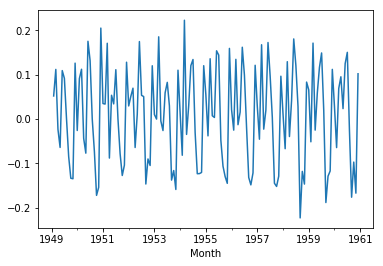

In [17]:
# differencing the data and plotting. creating a dataset of differences between the calues in our dataset
ts_log.diff().plot()

In [18]:
# checking for stationarity again. adding drop na because no have 1 less value in dataset due to difference calculation
kpss(ts_log.diff().dropna())

C:\UBS\Dev\Miniconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.10154458687402612,
 0.1,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Our p-value is now greater than 0.05 (it is 0.1), so we can accept the null hypothesis that our data is stationary.